<a href="https://colab.research.google.com/github/Shashank2579/Using_Transfer_Learning/blob/main/Dog_vs_Cat_Classification__Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing the Kaggle library
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [4]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:29<00:00, 29.5MB/s]
100% 812M/812M [00:29<00:00, 28.6MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.12132.jpg', 'dog.9467.jpg', 'cat.9900.jpg', 'dog.11964.jpg', 'dog.1614.jpg', 'dog.5639.jpg', 'dog.9416.jpg', 'dog.10717.jpg', 'dog.8783.jpg', 'dog.1485.jpg', 'dog.7235.jpg', 'dog.10651.jpg', 'cat.530.jpg', 'cat.6494.jpg', 'dog.8244.jpg', 'dog.2580.jpg', 'cat.7522.jpg', 'cat.4528.jpg', 'cat.4311.jpg', 'cat.2072.jpg', 'dog.6283.jpg', 'cat.7058.jpg', 'cat.1649.jpg', 'dog.6727.jpg', 'cat.7624.jpg', 'dog.1904.jpg', 'cat.5711.jpg', 'cat.7484.jpg', 'cat.410.jpg', 'dog.3948.jpg', 'cat.5626.jpg', 'dog.1112.jpg', 'dog.1571.jpg', 'dog.4066.jpg', 'cat.1003.jpg', 'cat.7136.jpg', 'cat.10814.jpg', 'cat.565.jpg', 'cat.4176.jpg', 'cat.6187.jpg', 'cat.4870.jpg', 'cat.9011.jpg', 'cat.3040.jpg', 'dog.2917.jpg', 'dog.3640.jpg', 'cat.860.jpg', 'cat.10543.jpg', 'cat.8524.jpg', 'dog.7640.jpg', 'dog.12113.jpg', 'dog.8752.jpg', 'cat.9896.jpg', 'dog.9040.jpg', 'cat.264.jpg', 'dog.10324.jpg', 'cat.4884.jpg', 'cat.11226.jpg', 'cat.6275.jpg', 'cat.7908.jpg', 'dog.10829.jpg', 'cat.9658.jpg', 'dog.9383.jpg', 'c

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

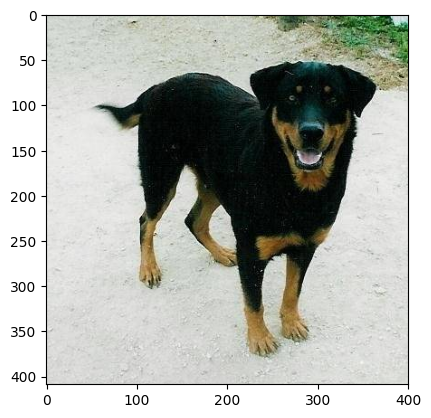

In [14]:
# display dog image
img = mpimg.imread('/content/train/dog.1614.jpg')
imgplt = plt.imshow(img)
plt.show()


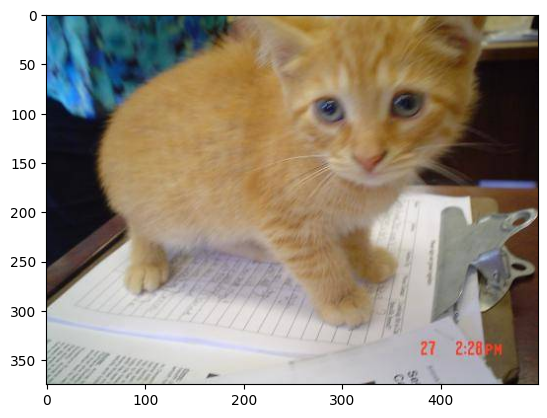

In [25]:
# display cat image
img = mpimg.imread('/content/train/cat.530.jpg')
imgplt = plt.imshow(img)
plt.show()

In [15]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
dog
cat
dog
dog


In [16]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images


In [17]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [18]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

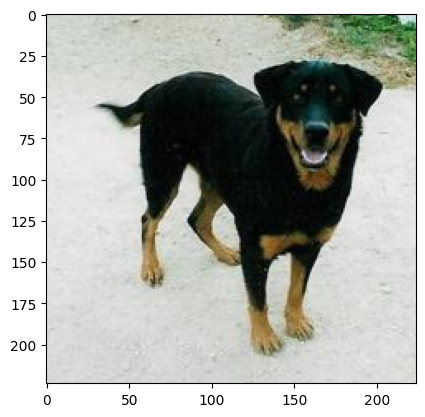

In [21]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.1614.jpg')
imgplt = plt.imshow(img)
plt.show()

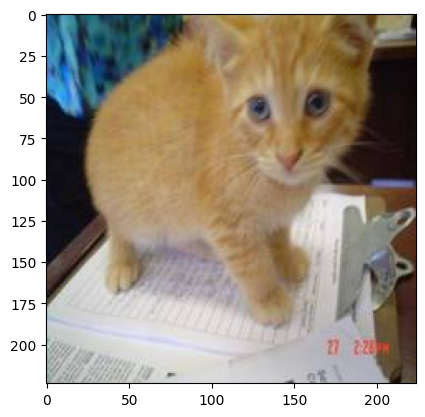

In [26]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.530.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**



Cat --> 0

Dog --> 1

In [27]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [28]:
print(filenames[0:5])
print(len(filenames))

['cat.12132.jpg', 'dog.9467.jpg', 'cat.9900.jpg', 'dog.11964.jpg', 'dog.1614.jpg']
2000


In [29]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 1, 1]
2000


In [30]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1018  982]


Converting all the resized images to numpy arrays

In [31]:
import cv2
import glob

In [32]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [33]:
print(dog_cat_images)

[[[[ 29  53  71]
   [ 26  50  68]
   [ 23  47  65]
   ...
   [ 75  94 101]
   [ 73  92 100]
   [ 74  93 101]]

  [[ 42  66  84]
   [ 40  64  82]
   [ 37  61  79]
   ...
   [ 73  92  99]
   [ 70  89  97]
   [ 71  90  98]]

  [[ 47  71  89]
   [ 46  70  88]
   [ 43  67  85]
   ...
   [ 78  97 105]
   [ 76  95 103]
   [ 77  96 104]]

  ...

  [[ 73  95 120]
   [ 82 104 129]
   [ 92 114 139]
   ...
   [ 67  75  88]
   [ 62  70  83]
   [ 60  68  81]]

  [[ 77  99 124]
   [ 80 102 127]
   [ 79 101 126]
   ...
   [ 66  74  87]
   [ 71  79  92]
   [ 61  69  82]]

  [[ 80 102 127]
   [ 78 100 125]
   [ 73  95 120]
   ...
   [ 82  90 103]
   [ 80  88 101]
   [ 50  58  71]]]


 [[[ 12  19  36]
   [ 12  19  36]
   [ 12  19  36]
   ...
   [ 22  24  24]
   [ 22  24  24]
   [ 22  24  24]]

  [[ 12  19  36]
   [ 12  19  36]
   [ 12  19  36]
   ...
   [ 22  24  24]
   [ 22  24  24]
   [ 22  24  24]]

  [[ 13  20  37]
   [ 13  20  37]
   [ 13  20  37]
   ...
   [ 22  24  24]
   [ 22  24  24]
   [ 22  24

In [34]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [35]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [38]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

**Building the Neural Network**

In [39]:
import tensorflow as tf
import tensorflow_hub as hub

In [40]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [41]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [42]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [43]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 80s 1s/step - loss: 0.2151 - acc: 0.9100
Epoch 2/5
50/50 [==============================] - 60s 1s/step - loss: 0.0701 - acc: 0.9750
Epoch 3/5
50/50 [==============================] - 58s 1s/step - loss: 0.0506 - acc: 0.9812
Epoch 4/5
50/50 [==============================] - 57s 1s/step - loss: 0.0401 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 58s 1s/step - loss: 0.0320 - acc: 0.9937


In [44]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 15s 1s/step - loss: 0.0370 - acc: 0.9875
Test Loss = 0.037021905183792114
Test Accuracy = 0.987500011920929


**Predictive System**

Path of the image to be predicted: /content/dog.jpg


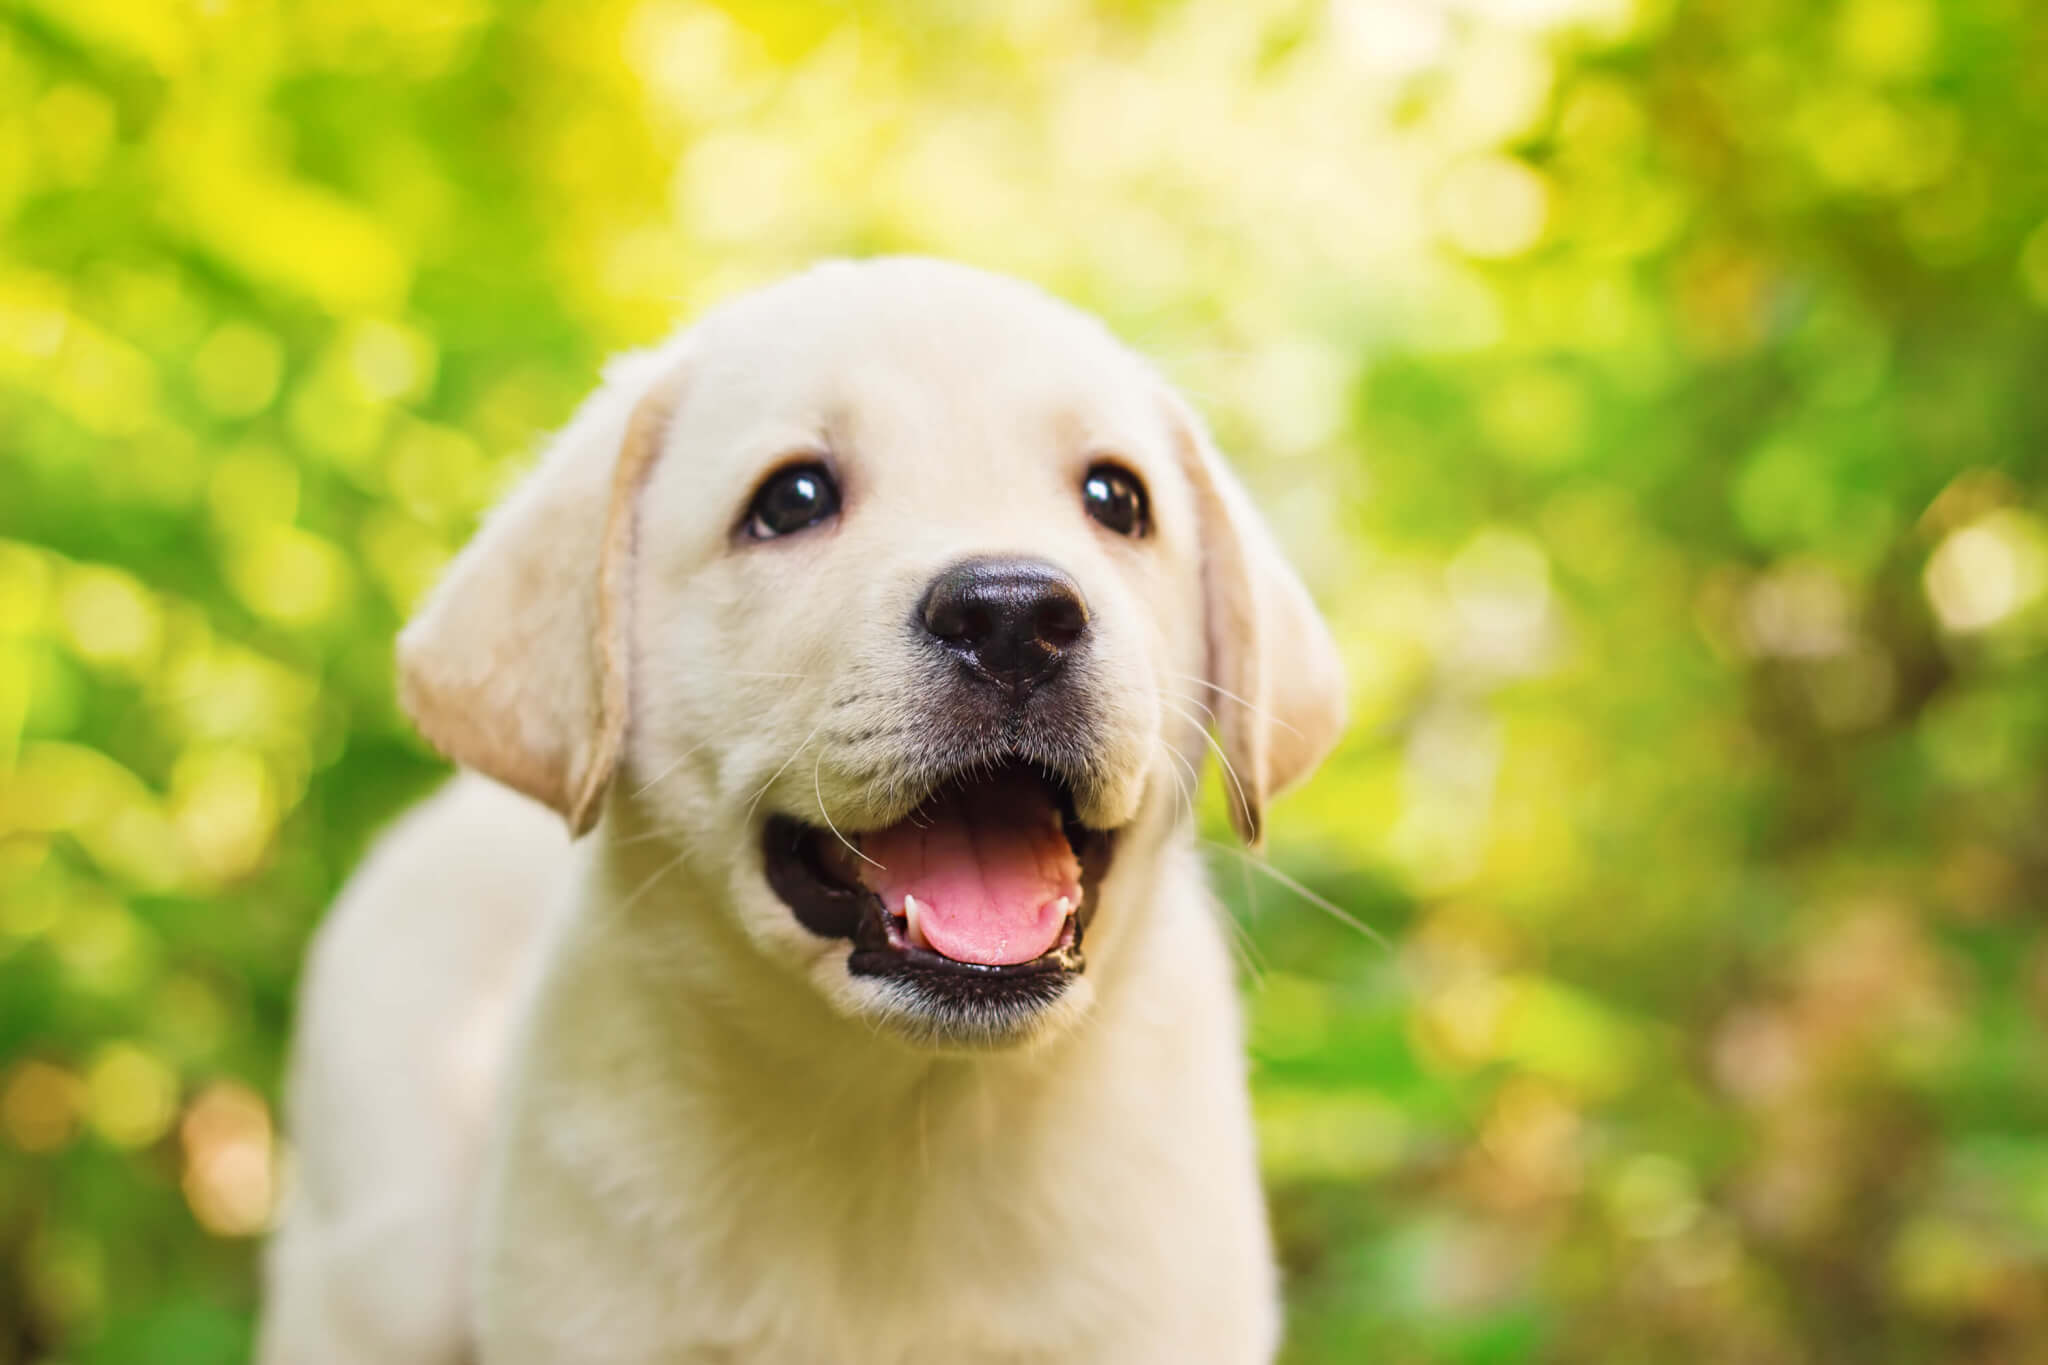

1/1 [==============================] - 1s 1s/step
[[-4.77112    3.7586584]]
1
The image represents a Dog


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.webp


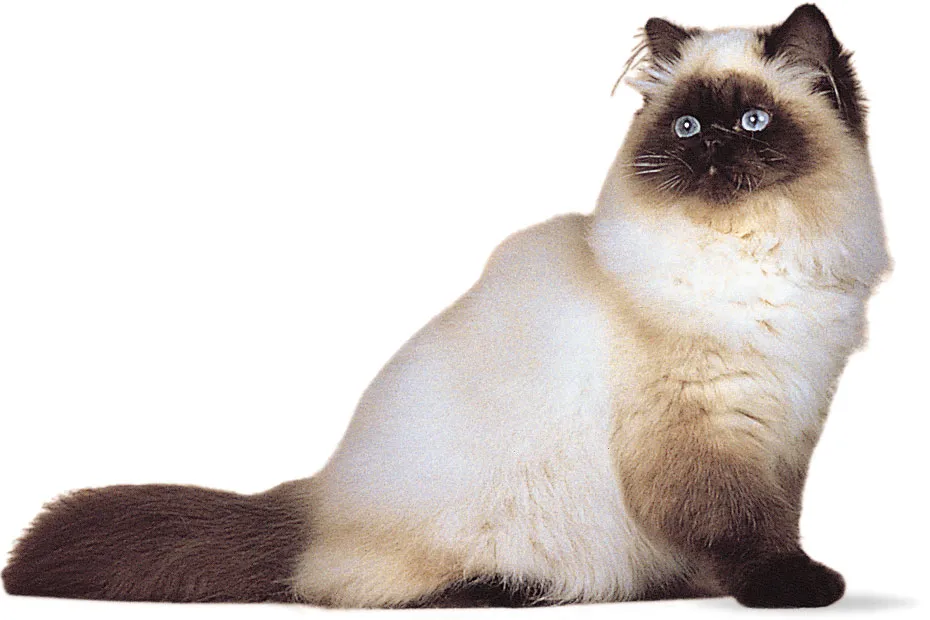

1/1 [==============================] - 0s 89ms/step
[[ 3.555201  -3.5459335]]
0
The image represents a Cat


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')